<a href="https://colab.research.google.com/github/lukasdekanovsky/Become_PythonDeveloper_AI/blob/main/KONVOLUCNI_(CNN)_Rozpozn%C3%A1v%C3%A1n%C3%AD_p%C3%ADsmen_28_x_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neuronová síť pro rozpoznání písmen


###Úkol ML1.2) Rozpoznání písmen
V této lekci jste viděli, jak rozpoznat psané číslice. Zkuste si úlohu předělat na rozpoznání psaných písmen. Datová sada pro písmena se jmenuje EMNIST: https://www.nist.gov/itl/products-and-services/emnist-dataset

In [ ]:
pip install extra-keras-datasets

In [ ]:
import tensorflow as tf

In [ ]:
from extra_keras_datasets import emnist

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = emnist.load_data(type="letters")
#další digits, ByClass, letters ....
#https://github.com/christianversloot/machine-learning-articles/blob/main/making-more-datasets-available-for-keras.md

In [ ]:
#formát dat v datové sadě emnist - 26 typů/písmen na obrázcích 28x28
print(x_train[0])
print(y_train[0])
#print(x_train.shape) #počet záznamů a AxB pixelu (124800, 28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   4   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  20 109 114  45   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 114 245 253 214   5   0   0   0   0   0  20 100  33   1   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 125 249 254 233  22   0   0   0   0  10 123 238 163  33   0
    0   0   0   2   4   4   0   0   0   0]
 [  0   0   0  82 233 254 251  82   2   0   0   3  79 220 254 244 126   0
    0   0   3  77 125 113   8   0   0   0]
 [  0   0   0  37 217 254 254 128   5   0   0  34 204 254 255 254 216   5
    0  22 154 247 254 253 111   3   0   0]
 [  0   0   0  37 217 254 254 160  16   0   3  84 233 254 255 254 233  22
   10  95 232 254 254 246  77   2   0   0]
 [  0   0   0  39 217 254 254 184  25   0  34 175 251 254 255 25

19


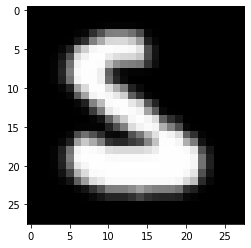

In [ ]:
#vyobrazení dat graficky
from matplotlib import pyplot as plt

pixels = x_train[84]
plt.imshow(pixels, cmap="gray")
print(y_train[84])

In [ ]:
#Datová normalizace - v rozsahu 0-1
x_train = x_train / 255.0
x_text = x_test / 255.0

print(x_train[0])

In [ ]:
#tvorba neuronové sítě
vstupni = tf.keras.layers.Flatten(input_shape=(28, 28))

skryta = tf.keras.layers.Dense(128, activation="relu")

zahazujici = tf.keras.layers.Dropout(0.15)

vystupni = tf.keras.layers.Dense(27) #máme 26 znaku abecedy

neuronova_sit = tf.keras.models.Sequential([vstupni, skryta, zahazujici, vystupni])


In [ ]:
# Predikce sítě bez cvičení pro 1. písmenko

odhady = neuronova_sit(x_test[:5]).numpy()
odhady = tf.nn.softmax(odhady).numpy()
skutecnost = y_test[:5]


for iodhad, odhad in enumerate(odhady):
  for cislo, pravdepodobnost in enumerate(odhad):
    print(f"{cislo}, {round(pravdepodobnost*100, 2)}%")
  print(f"skutecnost: {skutecnost[iodhad]}\n")

In [ ]:
ztratova_funkce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
neuronova_sit.compile(optimizer="adam", loss=ztratova_funkce, metrics=["accuracy"])

In [ ]:
neuronova_sit.fit(x_train, y_train, epochs=5)

In [ ]:
#vyhodnocení učení
neuronova_sit.evaluate(x_test, y_test)


In [ ]:
!curl -O https://raw.githubusercontent.com/do-community/tensorflow-digit-recognition/master/test_img.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   393  100   393    0     0   2847      0 --:--:-- --:--:-- --:--:--  2847


In [ ]:
#ověření funkčnosti na našem obrázku
from google.colab import files
nahrany_soubor = files.upload()

Saving pismenko-x.png to pismenko-x.png


In [ ]:
#zobrazení našeho obrázku
from PIL import Image
import numpy as np

jmeno_souboru = list(nahrany_soubor.keys())[0]
obrazek = Image.open(jmeno_souboru)
display(obrazek)

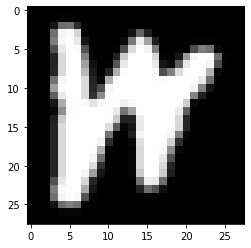

In [ ]:
#přeformátujeme si náš obrázek do podoby v jaké se učila neuronová síť
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [ ]:
from PIL import ImageOps

x = ImageOps.grayscale(obrazek) # odstiny_sedi
x = ImageOps.invert(x) # inverze_barev
#x = x.convert('1') # binarizovany_obrazek
x = np.array(x)
x = x / 255

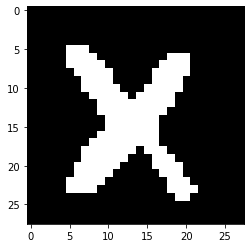

In [ ]:
plt.imshow(x, cmap="gray")

In [ ]:
print(x.shape)

(28, 28)


In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 28, 28)

In [ ]:
odhady = neuronova_sit(x).numpy()
odhady = tf.nn.softmax(odhady).numpy()

for iodhad, odhad in enumerate(odhady):
    for cislo, pravdepodobnost in enumerate(odhad):
        print(f"{cislo},{round(pravdepodobnost*100, 2)}%")

0,0.0%
1,0.0%
2,0.0%
3,0.0%
4,0.0%
5,0.0%
6,0.0%
7,0.0%
8,0.0%
9,0.0%
10,0.0%
11,0.01%
12,0.0%
13,0.0%
14,0.0%
15,0.0%
16,0.0%
17,0.0%
18,0.0%
19,0.0%
20,0.0%
21,0.0%
22,0.0%
23,0.0%
24,99.98%
25,0.0%
26,0.0%
